<b><font size='6'>Session 1 : Import Packages</font></b><br>
<font size='4'>Import Necessary Dependencies for Data Cleaning.</font>

In [72]:
# Connection to Local MySQL Database
import mysql.connector

# Data Exploration and Data Manipulation
import pandas as pd      
pd.set_option('display.max_columns',100)  
import numpy as np            

# Text Analysis
from nltk import word_tokenize
from collections import Counter

# Statistical Analysis
import wquantiles as wq     
import scipy.stats as stats    

# Data Visualization
import matplotlib.pyplot as plt           
import seaborn as sns        
plt.style.use('fivethirtyeight')

# Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

<b><font size='6'>Session 2 : Import Data from the Database</font></b><br>
<font size='4'>Load data from the local MySQL database.</font>

<b><font size='5'>1. Database Credentials</font></b>

In [30]:
database = mysql.connector.connect(user='export',password='export',database='gsearch_jobs')

<b><font size='5'>2. Query Data from the Database</font></b>

In [31]:
jobs = pd.read_sql_query(f"""
                SELECT 
                    title, company_name, location, via, posted_at, schedule_type, work_from_home,
                    salary, date_time, case 
                                            when description_tokens like '[]' then '[Not Known]' 
                                            else description_tokens 
                                        end as description_tokens
                FROM data_science_jobs;
                """, database)

<b><font size='6'>Session 3 : Understand the Data</font></b><br>
<font size='4'>Basic Data Exploration `i.e` check nulls, duplicate e.t.c</font>

<b><font size='5'>1. Information about the Data</font></b>

In [32]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               40839 non-null  object 
 1   company_name        40839 non-null  object 
 2   location            40811 non-null  object 
 3   via                 40830 non-null  object 
 4   posted_at           40839 non-null  object 
 5   schedule_type       40662 non-null  object 
 6   work_from_home      18364 non-null  float64
 7   salary              6961 non-null   object 
 8   date_time           40839 non-null  object 
 9   description_tokens  40839 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.1+ MB


<b><font size='5'>2. Descriptive Statistics on the Data</font></b>

In [33]:
jobs.describe().T

,count,mean,std,min,25%,50%,75%,max
work_from_home,18364.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


<b><font size='5'>3. Unique Values Check</font></b>

In [34]:
jobs.nunique()

title                 15268
company_name           9550
location                704
via                     603
posted_at                81
schedule_type            28
work_from_home            1
salary                 1442
date_time              4267
description_tokens     7955
dtype: int64

<b><font size='5'>4. Missing Values Check</font></b>

In [35]:
jobs.isna().sum()

title                     0
company_name              0
location                 28
via                       9
posted_at                 0
schedule_type           177
work_from_home        22475
salary                33878
date_time                 0
description_tokens        0
dtype: int64

<b><font size='5'>5. Duplicate Values Check</font></b>

In [36]:
jobs.duplicated().sum()

3

<b><font size='5'>6. Head of the DataFrame</font></b>

In [37]:
jobs.head()

,title,company_name,location,via,posted_at,schedule_type,work_from_home,salary,date_time,description_tokens
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,22 hours ago,Full-time,1.0,None,2023-08-02 03:00:13.054897,"['tableau', 'aws', 'sql']"
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,53 minutes ago,Full-time,1.0,None,2023-08-02 03:00:13.054897,[Not Known]
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,3 hours ago,Full-time,NaN,None,2023-08-02 03:00:13.054897,"['azure', 'excel', 'sql']"
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,23 hours ago,Contractor,1.0,None,2023-08-02 03:00:13.054897,['excel']
4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,20 hours ago,Full-time,NaN,None,2023-08-02 03:00:13.054897,"['powerpoint', 'excel']"


<b><font size='5'>7. Tail of the DataFrame</font></b>

In [38]:
jobs.tail()

,title,company_name,location,via,posted_at,schedule_type,work_from_home,salary,date_time,description_tokens
40834,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,23 hours ago,Full-time,NaN,"76,798–130,764 a year",2022-11-04 03:40:23.706734,"['tableau', 'power_bi', 'python', 'excel', 'sq..."
40835,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,23 hours ago,Full-time,NaN,"106,916–182,047 a year",2022-11-24 04:00:08.710801,[Not Known]
40836,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,23 hours ago,Full-time,NaN,"106,916–182,047 a year",2022-12-07 04:00:12.563831,[Not Known]
40837,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,23 hours ago,Full-time,NaN,"106,916–182,047 a year",2022-12-08 04:00:15.975728,[Not Known]
40838,Institutional Credit Management - Lending Data...,Citi,United States,via My ArkLaMiss Jobs,24 hours ago,Full-time,NaN,"105,850–158,780 a year",2023-01-25 04:00:26.521124,"['tableau', 'cognos']"


<b><font size='6'>Session 4 : Data Cleaning</font></b><br>
<font size='4'>Prepare the data for Exploratory Data Analysis, Data Visualization, Data Storytelling and Model Building.</font>

<b><font size='5'>Backup DataFrame</font></b><br>
<font size='4'>Create a backup dataframe for Data Cleaning.</font>

In [39]:
# create a copy of the jobs dataframe
data = jobs.copy()

<b><font size='5'>1. Job Platform</font></b><br>
<font size='4'>Rename `via` to `job_platform` and remove the `via` in the text.</font>

In [40]:
# rename via to job_platform
data.rename(columns={
    'via':'job_platform'
    },inplace=True)

In [41]:
# remove the text via 
data['job_platform'] = data['job_platform'].str.replace('via','').str.strip()

<b><font size='5'>2. Work from Home</font></b><br>
<font size='4'>Replace 1.0 with `Yes` and 0 with `No`.</font>

In [42]:
# use lambda function to replace 1.0 with Yes and the NaNs with Not Known
data['work_from_home'] = data['work_from_home'].apply(lambda x : 'Yes' if x == 1.0 else 'Not Known')

<b><font size='5'>3. Salary</font></b><br>
<font size='4'>Split the Salary into Hourly and Yearly, then find the Average Salary for Both.</font>

In [43]:
# filter the salary based on hourly and yearly rates
data['hourly_salary'] = np.where(data['salary'].str.contains('hour'),data['salary'],np.NAN)
data['yearly_salary'] = np.where(data['salary'].str.contains('year'),data['salary'],np.NAN)

In [44]:
# split the hourly and yearly salary into minimum and maximum then find the average
data[['min_hourly','max_hourly']] = data['hourly_salary'].str.split('–',expand=True)
data[['min_yearly','max_yearly']] = data['yearly_salary'].str.split('–',expand=True)

In [45]:
# function to clean and convert text to numerical values
def convert_int(text):
    data[text] = data[text].str.replace('an hour','').str.replace('a year','').str.replace('K','000').str.replace(',','')
    data[text] = round(pd.to_numeric(data[text])).astype('Int64') 

In [46]:
# call function for both hourly and yearly salary
convert_int('min_hourly')
convert_int('max_hourly')
convert_int('min_yearly')
convert_int('max_yearly')

In [47]:
# find the average salary for both hourly and yearly rates
data['hourly'] = np.add(data['min_hourly'],data['max_hourly']) / 2
data['yearly'] = np.add(data['min_yearly'],data['max_yearly']) / 2

In [48]:
# drop the unnecessary salary columns
data.drop(['hourly_salary','yearly_salary','min_hourly','max_hourly','min_yearly','max_yearly'],axis=1,inplace=True)

<b><font size='5'>4. Date Posted</font><b><br>
<font size='4'>Rename `date_time` to `date_posted` and Convert from object to datetime data type.</font>

In [49]:
# rename to date_posted
data.rename(columns={
    'date_time':'date_posted'
    },inplace=True)

In [50]:
# convert the data type from object to datetime
data['date_posted'] = pd.to_datetime(data['date_posted'])

<b><font size='5'>5. Skills</font></b><br>
<font size='4'>Rename `description_tokens` to `skills` and Remove Unnecessary Punctuations.</font>

In [51]:
# rename to skills
data.rename(columns={
    'description_tokens':'skills'
},inplace=True)

In [52]:
# remove unnecessary punctuations
data['skills'] = data['skills'].str.replace('[','').str.replace(']','').str.replace("'","")

<b><font size='5'>6. Feature Creation</font></b><br>
<font size='4'>Extract year, month and day from the Date Posted.</font>

In [59]:
# extract year, month and day
data['year'] = data['date_posted'].dt.year     
data['month'] = data['date_posted'].dt.month
data['month_name'] = data['date_posted'].dt.month_name()
data['day'] = data['date_posted'].dt.day     
data['day_name'] = data['date_posted'].dt.day_name()

<b><font size='5'>7. Rearrange columns in the DataFrame</font></b>

In [60]:
data = data[[
    'title','company_name','location','job_platform','date_posted','year','month','month_name','day','day_name',
    'posted_at','schedule_type','work_from_home','hourly','yearly','skills'
]].copy()

<b><font size='6'>Session 5 : Exploratory Data Analysis</font></b><br>
<font size='4'>Perform Estimates of Location, Estimates of Variability, Exploring Data Distribution e.t.c</font>

<b><font size='5'>i. Estimates of Location</font></b><br>
<font size='4'>Estimate of where most of the data is located i.e it's central tendency.</font>

<b><font size='4'>1. Mean</font></b><br>
<font size='4'>Sum of all values divided by the number of values.</font>

In [58]:
print(f"Average Hourly Salary : ${data['hourly'].mean():,.2f}\nAverage Yearly Salary : ${data['yearly'].mean():,.2f}")

Average Hourly Salary : $41.81
Average Yearly Salary : $98,984.94


<b><font size='4'>2. Weighted Mean</font></b><br>
<font size='4'>Sum of all values times a weight divided by the sum of the weights.</font>

In [68]:
print(f"Average Hourly Salary : ${np.average(data['hourly'],weights=data['day']):,.2f}\nAverage Yearly Salary : ${np.average(data['yearly'],weights=data['month']):,.2f}")

Average Hourly Salary : $nan
Average Yearly Salary : $nan


<b><font size='4'>3. Median</font></b><br>
<font size='4'>Value such that one-half of the data lies below and above the sorted data.</font>

In [71]:
print(f"Average Hourly Salary : ${data['hourly'].median():,.2f}\nAverage Yearly Salary : ${data['yearly'].median():,.2f}")

Average Hourly Salary : $35.00
Average Yearly Salary : $96,500.00


<b><font size='4'>4. Weighted Median</font></b><br>
<font size='4'>Value such that one-half of the sum of weights lies below and above the sorted data.</font>

In [74]:
print(f"Average Hourly Salary : ${wq.median(data['hourly'],weights=data['day'])}\nAverage Yearly Salary : ${wq.median(data['yearly'],weights=data['month']):,.2f}")

Average Hourly Salary : $nan
Average Yearly Salary : $nan


<b><font size='4'>5. Trim Mean</font></b><br>
<font size='4'>Average of all values after dropping a fixed number of extreme values.</font>

In [77]:
print(f"Average Hourly Salary : ${stats.trim_mean(data['hourly'],0.1):,.2f}\nAverage Yearly Salary : ${stats.trim_mean(data['yearly'],0.1):,.2f}")

Average Hourly Salary : $nan
Average Yearly Salary : $nan


<b><font size='5'>ii. Estimates of Variability</font></b><br>
<font size='4'>Estimate of whether data values are tightly clustered or spread out.</font>

<b><font size='4'>1. Variance</font></b><br>
<font size='4'>Sum of squared deviations from the mean divided by n-1, where n is the number of data values.</font>

In [78]:
print(f"Hourly Variance : ${data['hourly'].var():,.2f}\nYearly Variance : ${data['yearly'].var():,.2f}")

Hourly Variance : $534.14
Yearly Variance : $1,271,037,792.33


<b><font size='4'>2. Standard Deviation</font></b><br>
<font size='4'>Square root of variance.</font>

In [79]:
print(f"Hourly Deviation : ${data['hourly'].std():,.2f}\nYearly Deviation : ${data['yearly'].std():,.2f}")

Hourly Deviation : $23.11
Yearly Deviation : $35,651.62


<b><font size='4'>3. Mean Absolute Deviation</font></b><br>
<font size='4'>Mean of the absolute values of the deviations from the mean.</font>

In [81]:
print(f"Hourly Deviation : ${np.average(np.absolute(data['hourly']-data['hourly'].mean())):,.2f}\nYearly Deviation : ${np.average(np.absolute(data['yearly']-data['yearly'].mean())):,.2f}")

Hourly Deviation : $nan
Yearly Deviation : $nan


<b><font size='4'>4. Median Absolute Deviation from the Median</font></b><br>
<font size='4'>Median of the absolute values of the deviations from the median.</font>

In [82]:
print(f"Hourly Deviation : ${np.median(np.absolute(data['hourly']-data['hourly'].median())):,.2f}\nYearly Deviation : ${np.median(np.absolute(data['yearly']-data['yearly'].median())):,.2f}")

Hourly Deviation : $nan
Yearly Deviation : $nan


<b><font size='4'>5. Interquartile Range</font></b><br>
<font size='4'>Difference between the 75th and 25th percentile.</font>

In [83]:
h1,h2 = np.percentile(data['hourly'],[75,25])
y1,y2 = np.percentile(data['yearly'],[75,25])
print(f"Hourly IQR : ${np.subtract(h1,h2):,.2f}\nYearly IQR : ${np.subtract(y1,y2)}")

Hourly IQR : $nan
Yearly IQR : $nan


<b><font size='5'>iii. Exploring the Data Distribution</font></b><br>
<font size='4'>Explore how data is overally distributed.</font>

<b><font size='4'>1. Percentiles and Boxplots</font></b><br>
<font size='4'>Percentile is the value such that P percent of data values lies below the sorted data.<br>
Boxplots based on Percentiles provide a quick way to visualize data distributions.</font>

In [84]:
data[['hourly','yearly']].quantile([0.05,0.25,0.5,0.75,0.95])

,hourly,yearly
0.05,15.0,53014.0
0.25,25.0,77500.0
0.50,35.0,96500.0
0.75,57.5,111545.5
0.95,84.25,165000.0


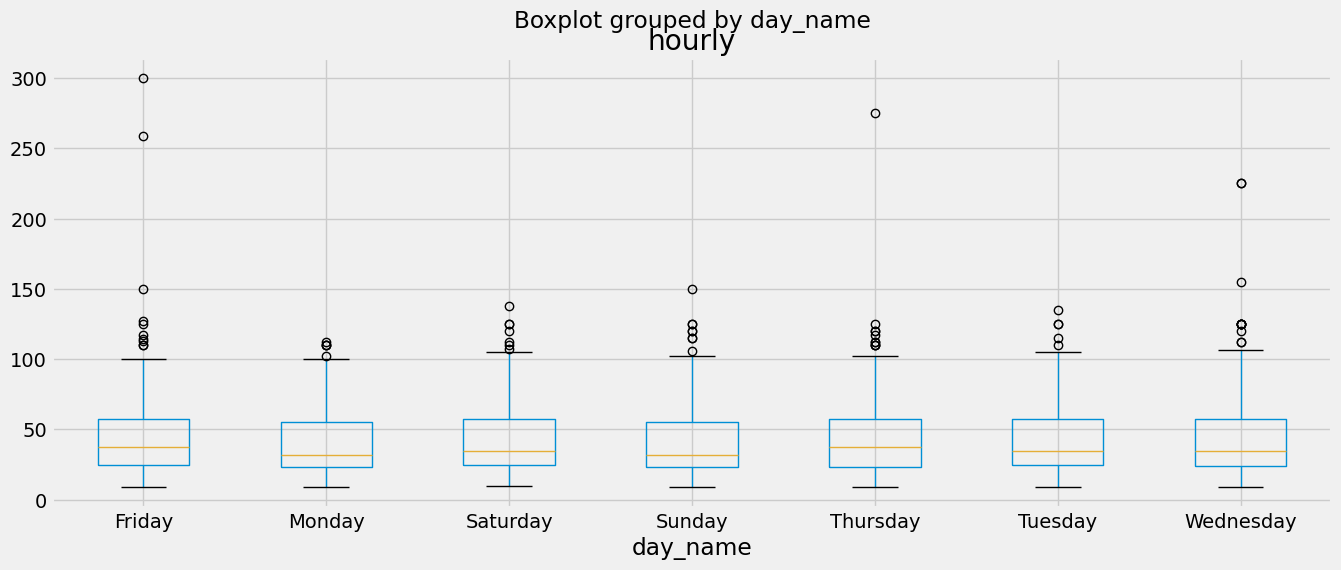

In [87]:
data.boxplot(by='day_name',column='hourly',figsize=(16,6))
plt.show()

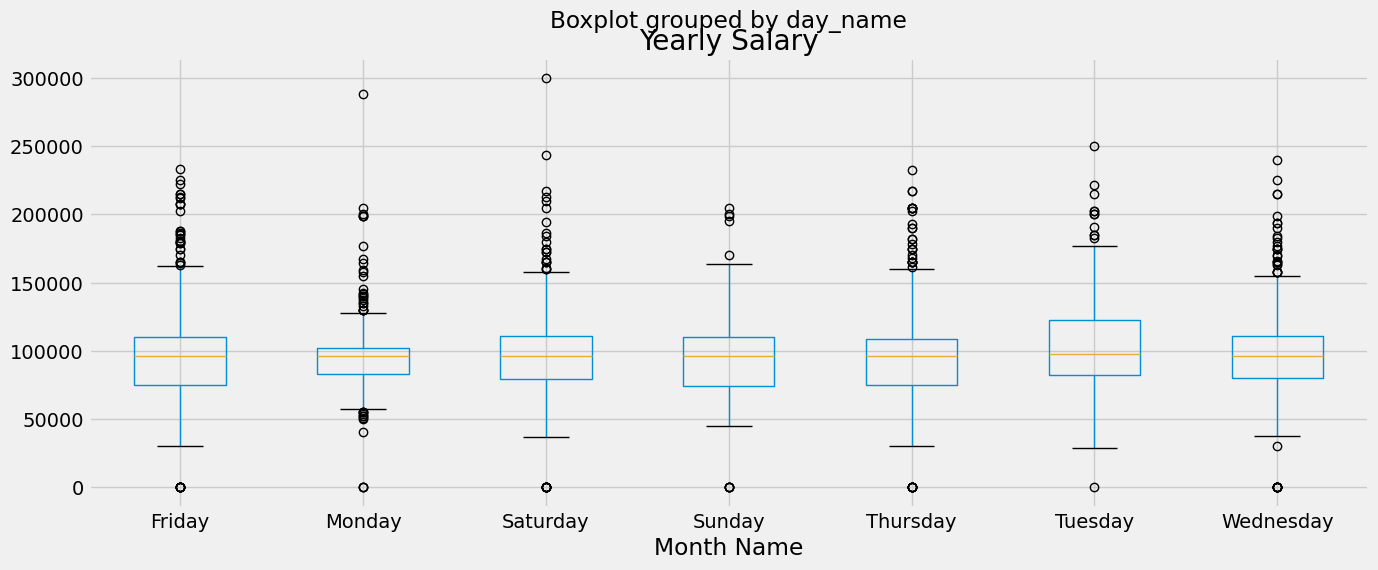

In [93]:
data.boxplot(by='day_name',column='yearly',figsize=(16,6))
plt.xlabel('Month Name')
plt.title('Yearly Salary')
plt.show()

In [61]:
data.iloc[:2]

,title,company_name,location,job_platform,date_posted,year,month,month_name,day,day_name,posted_at,schedule_type,work_from_home,hourly,yearly,skills
0,Data Analyst,Cisco Meraki,Anywhere,LinkedIn,2023-08-02 03:00:13.054897,2023,8,August,2,Wednesday,22 hours ago,Full-time,Yes,<NA>,<NA>,"tableau, aws, sql"
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,LinkedIn,2023-08-02 03:00:13.054897,2023,8,August,2,Wednesday,53 minutes ago,Full-time,Yes,<NA>,<NA>,Not Known
